In [65]:
%matplotlib inline
import numpy as np
from scipy.misc import imread
import pickle
import matplotlib.pyplot as plt
from scipy.misc import imread
import tensorflow as tf
from keras.preprocessing import image
from keras.backend.tensorflow_backend import set_session
from ssd import SSD300
from keras.applications.imagenet_utils import preprocess_input
from ssd_utils import BBoxUtility

np.set_printoptions(suppress=True)
config = tf.ConfigProto(
    gpu_options=tf.GPUOptions(
        allow_growth=True # True->必要になったら確保, False->全部
    )
)
sess = sess = tf.Session(config=config)


In [66]:
NYU_CLASSES =  ['soda_can', 'caffee_mug', 'cap', 'flashlight', 'bowl', 'cereal_box']
NUM_CLASSES = len(NYU_CLASSES) + 1
input_shape = (300, 300, 3) #channel last

In [67]:
# model = SSD300(input_shape, num_classes=NUM_CLASSES)
# model.load_weights('../checkpoints/SUNRGBD/weights.best.hdf5')

In [97]:
gt = pickle.load(open('../pkls/rgbd-scenes/RGB.pkl', 'rb'))
keys = sorted(gt.keys())
num_train = int(round(0.8 * len(keys)))
train_keys = keys[:num_train]
val_keys = keys[num_train:]
num_val = len(val_keys)

In [98]:
path_prefix = '../dataset/rgbd-scenes/'
inputs = []
images = []
img_path = path_prefix + sorted(train_keys)[110]
img = image.load_img(img_path)
img = image.img_to_array(img)
images.append(imread(img_path))
inputs.append(img.copy())
#inputs = preprocess_input(np.array(inputs))

# img_path = path_prefix + sorted(keys)[3]
# img = image.load_img(img_path)
# img = image.img_to_array(img)

In [99]:
# priors = pickle.load(open('../pkls/prior_boxes_ssd300.pkl', 'rb'))
# bbox_util = BBoxUtility(NUM_CLASSES, priors)
# preds = model.predict(inputs, batch_size=1, verbose=1)
# results = bbox_util.detection_out(preds)

[ 0.01666667  0.49375     0.17833333  0.34791667  0.          0.          0.
  0.          1.          0.        ]
(480, 640, 3)


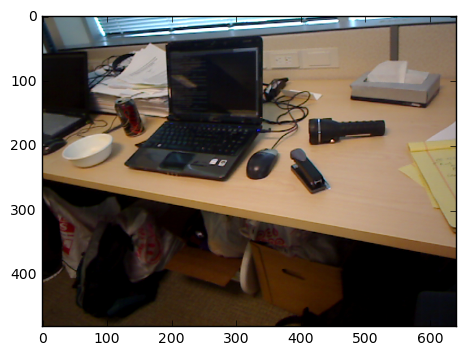

In [100]:
#train_keys[0]
results = gt[train_keys[110]]
print(results[0])
plt.imshow(img/255.)
print(img.shape)

11
114
237
167


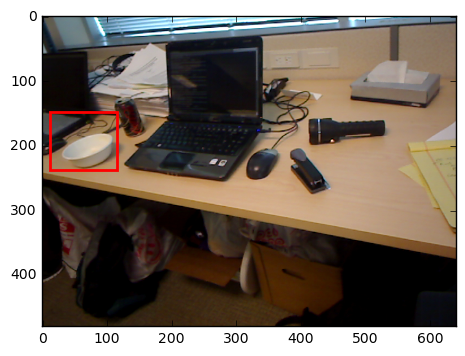

In [103]:
        
# colors = plt.cm.hsv(np.linspace(0, 1, 12)).tolist()
# currentAxis = plt.gca()
# plt.imshow(img / 255.)
# for array in results:
#     top_indices = [i for i, conf in enumerate(det_conf) if conf >= 0.8]
#     xmin = int(round(array[0] * img.shape[1]))
#     ymin = int(round(array[1] * img.shape[0]))
#     xmax = int(round(array[2] * img.shape[1]))
#     ymax = int(round(array[3] * img.shape[0]))
#     label = int(top_indices[0])
#     label_name = NYU_CLASSES[label - 1]
#     display_txt = '{:0.2f}, {}'.format(score, label_name)
#     coords = (xmin, ymin), xmax, ymax
#     color = colors[label]
#     currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
#     currentAxis.text(xmin, ymin, display_txt, bbox={'facecolor':color, 'alpha':0.5})

# plt.show()
        
colors = plt.cm.hsv(np.linspace(0, 1, 12)).tolist()
currentAxis = plt.gca()
plt.imshow(img / 255.)
# for array in results:

# print(img.shape)
xmin = int(round(results[0][0] * img.shape[1]))
ymin = int(round(results[0][1] * img.shape[0]))
xmax = int(round(results[0][2] * img.shape[1]))
ymax = int(round(results[0][3] * img.shape[0]))
print(xmin)
print(xmax)
print(ymin)
print(ymax)
label = 0
label_name = NYU_CLASSES[label]
#display_txt = '{:0.2f}, {}'.format(1, label_name)
coords = (xmin, ymin),  xmax-xmin+1, ymax-ymin-20
color = colors[label]
currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
#currentAxis.text(xmin, ymin, label_name, bbox={'facecolor':color, 'alpha':0.5})

plt.show()

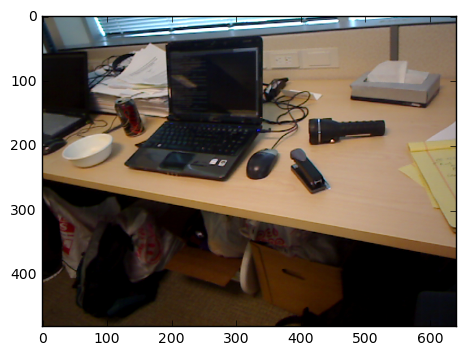

In [102]:
plt.imshow(img/255.)